In [2]:
import os
import logging # doesn't work well in a notebook, without some fu
import rmgpy
import rmgpy.rmg
import rmgpy.rmg.input
#from rmgpy.display import display
from IPython.display import display
from rmgpy.chemkin import loadChemkinFile, readSpeciesBlock, readThermoBlock, readReactionsBlock, removeCommentFromLine
from rmgpy.data.thermo import Entry, saveEntry
from rmgpy.data.base import Entry as kinEntry
from rmgpy.data.kinetics.common import saveEntry as kinSaveEntry
from rmgpy.molecule import Molecule
from rmgpy.rmg.model import Species
from rmgpy.reaction import Reaction
from rmgpy.kinetics import Arrhenius
from rmgpy.cantherm.output import prettify
from rmgpy.rmg.main import RMG, initializeLog
from rmgpy.molecule.draw import MoleculeDrawer
import cPickle as pickle

In [4]:
with open("importerKinetics.pkl", "r") as f:
    importerKinetics = pickle.load(f)

In [5]:
importerKinetics

{Reaction(reactants=[Species(label="IC4H9T", molecule=[Molecule(SMILES="C[C](C)C")]), Species(label="C2H6", molecule=[Molecule(SMILES="CC")])], products=[Species(label="IC4H10", molecule=[Molecule(SMILES="CC(C)C")]), Species(label="C2H5", molecule=[Molecule(SMILES="C[CH2]")])], reversible=False, duplicate=True): {'PCI2013/289-Dagaut': Arrhenius(A=(61050,'cm^3/(mol*s)'), n=2, Ea=(10924.3,'cal/mol'), T0=(1,'K'))},
 Reaction(reactants=[Species(label="CHCHCH3", molecule=[Molecule(SMILES="[CH]=CC")]), Species(label="N1C4H9OH", molecule=[Molecule(SMILES="CCCCO")])], products=[Species(label="C3H6", molecule=[Molecule(SMILES="C=CC")]), Species(label="CH3CH2CH2CH2O", molecule=[Molecule(SMILES="CCCC[O]")])], reversible=False): {'PCI2013/289-Dagaut': Arrhenius(A=(18900,'cm^3/(mol*s)'), n=2, Ea=(7225.57,'cal/mol'), T0=(1,'K'))},
 Reaction(reactants=[Species(label="c4h6-2", molecule=[Molecule(SMILES="CC#CC")])], products=[Species(label="h", molecule=[Molecule(SMILES="[H]")]), Species(label="c4h5-2"

In [63]:
i = 0
comparisonKinetics = {}
for rxn in importerKinetics:
    
    
    mols = []
    for reactant in rxn.reactants:
        mols.append(reactant.molecule[0])
    for product in rxn.products:
        mols.append(product.molecule[0])

    if Molecule().fromSMILES("OO") and Molecule().fromSMILES("[O]O") in mols and len(mols) == 4:
        print "Reaction WAS OOH abstraction"
        print rxn
        print
        comparisonKinetics[rxn] = importerKinetics[rxn]
        i += 1
    elif len(mols) != 4:
        print "Reaction was not bimolecular"
        print rxn
        print
        
    else:
        print "Reaction was not OOH Abstraction"
        print rxn
        print 

Reaction was not OOH Abstraction
IC4H9T + C2H6 => IC4H10 + C2H5

Reaction was not OOH Abstraction
CHCHCH3 + N1C4H9OH => C3H6 + CH3CH2CH2CH2O

Reaction was not bimolecular
c4h6-2 <=> h + c4h5-2

Reaction was not OOH Abstraction
C3H3 + N2C4H9OH => AC3H4 + CH3CHCHOHCH3

Reaction WAS OOH abstraction
O2 + CH3CHO <=> R13CH2CHO + R3OOH

Reaction was not bimolecular
c2h5o2 <=> c2h5 + o2

Reaction was not bimolecular
c4h7oh-1ooh-4 => c4h7oho1-4 + oh

Reaction was not OOH Abstraction
ch3 + c2h5 <=> ch4 + c2h4

Reaction was not bimolecular
c4h7oh-2ooh-1 => c4h7oho1-2 + oh

Reaction was not bimolecular
c4h6o23 <=> ch3chchcho

Reaction was not OOH Abstraction
CH2C3H5 + CH3COCH3 => NC4H8 + CH3COCH2

Reaction was not bimolecular
c4h7oh-2ooh-4 => c4h7oho2-4 + oh

Reaction was not bimolecular
i-C4H5 <=> C2H3 + C2H2

Reaction was not bimolecular
c4h7oh-3ooh-1 => c4h7oho1-3 + oh

Reaction was not OOH Abstraction
h2 + sc4h9o2 <=> h + sc4h9o2h

Reaction was not OOH Abstraction
C3H3 + OH <=> CH2O + C2H2

Re

In [45]:
print "There were {} total imported reactions and {} bimolecular OOH reactions.".format(len(importerKinetics), len(comparisonKinetics))

There were 6303 total imported reactions and 464 bimolecular OOH reactions.


In [62]:
comparisonKinetics.keys()

['CH3OH + HO2 <=> CH3O + H2O2',
 'ch3coch2o2 + h2o2 <=> c3ket21 + ho2',
 'nc3h7 + o2 <=> c3h6 + ho2',
 'c3h5oh + ho2 <=> ch2cch2oh + h2o2',
 'tc4h9oh + ho2 <=> tc4h8oh + h2o2',
 'HCO3 + H2O2 => HCO3H + HO2',
 'sc4h9 + ho2 <=> t2c4h8 + h2o2',
 'ch3ocho + o2 <=> ch2ocho + ho2',
 'c4h5-i + ho2 <=> c4h6 + o2',
 'ic3h7cho + ho2 <=> tc3h6cho + h2o2',
 'sc4h8oh-mo2 + h2o2 <=> sc4h8oh-mo2h + ho2',
 'ch3och3 + o2 <=> ch3och2 + ho2',
 'c4h8oh-2o2 + h2o2 <=> c4h8oh-2o2h + ho2',
 'c2h5cho + ho2 <=> c2h5co + h2o2',
 'sc4h9oh + ho2 <=> sc4h8oh-1 + h2o2',
 'c4h7oh-4ooh-1 + o2 <=> nc4ket14 + ho2',
 'sc4h8oh-mo2 + ho2 <=> sc4h8oh-mo2h + o2',
 'ic3h7cho + ho2 <=> ic3h7co + h2o2',
 'ic4h8oh-2 + ho2 <=> ic4h8oh-2o + oh',
 'tc3h6cho + ho2 <=> tc3h6ocho + oh',
 'ch4 + ho2 <=> ch3 + h2o2',
 'HO2 + H2O => H2O2 + OH',
 'ic3h5cho + o2 <=> ic3h5co + ho2',
 'c2h3oh + ho2 <=> ch3cho + ho2',
 'c4h7oh-3ooh-1 + o2 <=> nc4ket13 + ho2',
 'sc4h9o2 + ho2 <=> sc4h9o2h + o2',
 'nc4h9oh + ho2 <=> c4h8oh-2 + h2o2',
 'ch3ocho

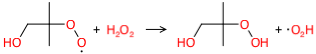

In [54]:
rxn = Reaction(reactants=[Species(label="ic4h8oh-2o2", molecule=[Molecule(SMILES="CC(C)(CO)O[O]")]), Species(label="h2o2", molecule=[Molecule(SMILES="OO")])], products=[Species(label="ic4h8oh-2o2h", molecule=[Molecule(SMILES="CC(C)(CO)OO")]), Species(label="ho2", molecule=[Molecule(SMILES="[O]O")])])
rxn

In [60]:
rxnList = []
for rxn in comparisonKinetics.keys():
    rxnList.append(str(rxn))
rxnList

['ch3 + ho2 <=> ch4 + o2',
 'HO2 + HOOCHO <=> H2O2 + OOCHO',
 'C2H3 + H2O2 <=> C2H4 + HO2',
 'CH3CHCOCH3 + HO2 => C2H5COCH3 + O2',
 'co + ho2 <=> co2 + oh',
 'ho2 + oh <=> h2o + o2',
 'ch2o + o2 <=> hco + ho2',
 'ch3chco + o2 <=> c2h3co + ho2',
 'ch2cch2oh + h2o2 <=> c3h5oh + ho2',
 'c3h8 + o2 <=> ic3h7 + ho2',
 'tc4h9oh + o2 <=> ho2 + tc4h9o',
 'c4h7oh1-2 + ho2 <=> c4h6oh1-32 + h2o2',
 'ch3ocho + ho2 <=> ch2ocho + h2o2',
 'c3h8 + o2 <=> nc3h7 + ho2',
 'c4h7oh1-2 + o2 <=> c4h6oh1-32 + ho2',
 'pc3h4 + ho2 <=> ch3co + ch2o',
 'tc4h8oh-o2 + h2o2 <=> tc4h8oh-o2h + ho2',
 'c2h5cho + ho2 <=> c2h5co + h2o2',
 'ic4h7oh-3ooh-1 + o2 <=> ic4ketii + ho2',
 'C3H6 + HO2 <=> propen1ol + OH',
 'C2H5 + H2O2 <=> C2H6 + HO2',
 'C2H3CHO + HO2 => C2H3CH2O + O2',
 'c3h5oh + o2 <=> ch2cch2oh + ho2',
 'c2h5coch3 + ho2 <=> ch3chcoch3 + h2o2',
 'nc3h7o2 + ho2 <=> nc3h7o2h + o2',
 'C4H6-12 + R3OOH <=> iC4H5 + H2O2',
 'O2 + C2H5CHO => HO2 + C2H4CHO',
 'ic4h9o + o2 <=> ic3h7cho + ho2',
 'O2 + CH3CHCH2CH2OH <=> HO2

In [74]:
nateDirectory = "/gss_gpfs_scratch/harms.n/QMscratch"
westGroupDirectory = "/gss_gpfs_scratch/westgroup/QMscratch"
dataDumpDirectory = "/gss_gpfs_scratch/westgroup/ScienceDataDump/Reactions/H_Abstraction"

"""nate_reactions = os.listdir(nateDirectory)
west_reactions = os.listdir(westGroupDirectory)
dump_reactions = os.listdir(dataDumpDirectory)"""

nate_reactions = ["CC(C)CO+[O]O_C[C](C)CO+OO"]
west_reactions = ["CC(C)C(=O)C(C)(C)OO+[O]O_CC(C)C(=O)C(C)(C)O[O]+OO"]
dump_reactions = ["CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO"]

previous_reactions = []
paths = []
for reaction in nate_reactions:
    if reaction not in previous_reactions:
        previous_reactions.append(reaction)
        paths.append(os.path.join(nateDirectory, reaction, "output.py"))
    else:
        print "Duplicate reaction {}".format(reaction)
        
for reaction in west_reactions:
    if reaction not in previous_reactions:
        previous_reactions.append(reaction)
        paths.append(os.path.join(westGroupDirectory, reaction, "output.py"))
    else:
        print "Duplicate reaction {}".format(reaction)
        
for reaction in dump_reactions:
    if reaction not in previous_reactions:
        previous_reactions.append(reaction)
        paths.append(os.path.join(dataDumpDirectory, reaction, "output.py"))
    else:
        print "Duplicate reaction {}".format(reaction)
        

        

In [75]:
previous_reactions, paths



(['CC(C)CO+[O]O_C[C](C)CO+OO',
  'CC(C)C(=O)C(C)(C)OO+[O]O_CC(C)C(=O)C(C)(C)O[O]+OO',
  'CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO'],
 ['/gss_gpfs_scratch/harms.n/QMscratch/CC(C)CO+[O]O_C[C](C)CO+OO/output.py',
  '/gss_gpfs_scratch/westgroup/QMscratch/CC(C)C(=O)C(C)(C)OO+[O]O_CC(C)C(=O)C(C)(C)O[O]+OO/output.py',
  '/gss_gpfs_scratch/westgroup/ScienceDataDump/Reactions/H_Abstraction/CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO/output.py'])

In [79]:
## Using the reaciton filtering tool used in filter kinetics

to_try = []
for path in paths:
    try:
        assert os.path.exists(path), "Doesn't have output.py file"
        to_try.append(reaction)
        
    except Exception as err:
        print "# ⚠️", reaction, "Gave error", str(err)
len(to_try)

for path in to_try:
    try:
        print path
        
        with open(path) as f:
            lines = f.readlines()
        start = lines.index('kinetics(\n')
        print
        print "# {} from {}".format(path)
        print ''.join(lines[start:])
        success += 1
        
    except Exception as err:
        print "# ⚠️", reaction, "Gave error", str(err)
        fail += 1

# ⚠️ CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO Gave error Doesn't have output.py file
# ⚠️ CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO Gave error Doesn't have output.py file
# ⚠️ CC(C)C(=O)C(C)COO+[O]O_CC(C)C(=O)C(C)CO[O]+OO Gave error Doesn't have output.py file


In [ ]:
%%capture cap --no-stderr
for path in to_try:
    try:
        print path
        
        with open(path) as f:
            lines = f.readlines()
        start = lines.index('kinetics(\n')
        print
        print "# {} from {}".format(path)
        print ''.join(lines[start:])
        success += 1
        
    except Exception as err:
        print "# ⚠️", reaction, "Gave error", str(err)
        fail += 1